In [13]:
#改寫lesson15_1的內容，我錯誤不要用None，我要傳出錯誤訊息
#運用「8.2錯誤與例外」的class
#raise Exception('spam', 'eggs') -> raise Exception('錯誤訊息')

import requests
def download() ->requests.Response | None:
    url='https://data.moi.gov/MoiOD/System/DownloadFile.aspx?DATA=CA18EE06-4A50-4861-9D97-7853353D7108'

    response = requests.request('GET', url)

    try:
        response.raise_for_status()
    except:
        raise Exception('連線發生錯誤', '網路中斷')  #與break相同，執行到這邊會自動停止不執行後面的程式     
    else:
        if not response.ok:
            raise Exception('下載錯誤', '伺服器錯誤訊息')
        else:
            return response  

In [12]:
#except Exception as inst
#如果回傳出Exception例外，把我的例外訊息給e這個變數
#嘗試把上面網址的tw拿掉顯示錯誤訊息

try:
    response = download()
except Exception as e:
    print(f'錯誤:{e}') #原本用.arg這個型別儲存，但錯誤顯示不出來，所以老師拿掉了
else:
    print(response.text)

錯誤:HTTPSConnectionPool(host='data.moi.gov', port=443): Max retries exceeded with url: /MoiOD/System/DownloadFile.aspx?DATA=CA18EE06-4A50-4861-9D97-7853353D7108 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001F42E8EF910>: Failed to resolve 'data.moi.gov' ([Errno 11001] getaddrinfo failed)"))


In [15]:
'''args怎麼加進去？'''
#except Exception as inst
#如果回傳出Exception例外，把我的例外訊息給e這個變數
#嘗試把上面網址的tw拿掉顯示錯誤訊息

try:
    response = download()
except Exception as inst:
    print(inst.args) #原本用.arg這個型別儲存，但錯誤顯示不出來，所以老師拿掉了
else:
    print(response.text)

(MaxRetryError('HTTPSConnectionPool(host=\'data.moi.gov\', port=443): Max retries exceeded with url: /MoiOD/System/DownloadFile.aspx?DATA=CA18EE06-4A50-4861-9D97-7853353D7108 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001F42EBF4A90>: Failed to resolve \'data.moi.gov\' ([Errno 11001] getaddrinfo failed)"))'),)


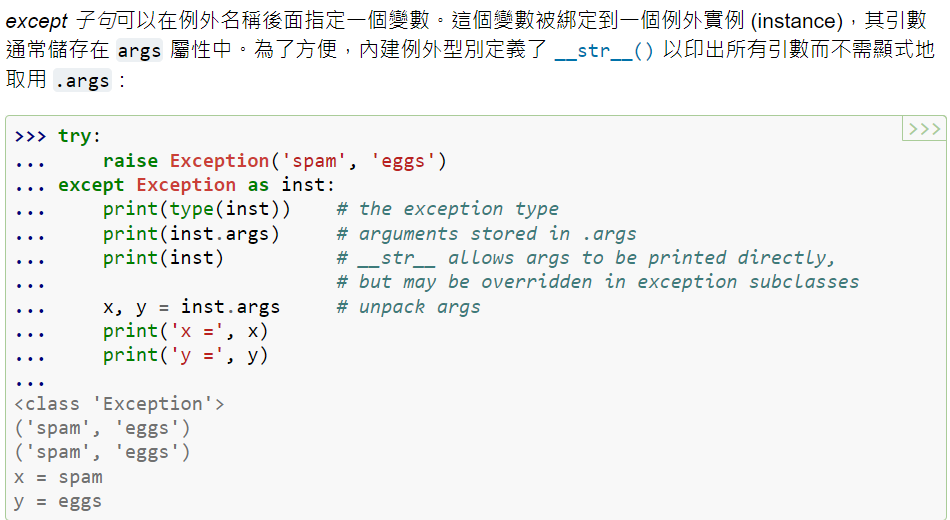

In [20]:
#將字串資料寫入csv檔案 內建io模組
import requests
import csv
import io

def download() ->list[list] | Exception: #預計傳出的資料型別list，裡面可以做list中的list，就是二維的
    url='https://data.moi.gov.tw/MoiOD/System/DownloadFile.aspx?DATA=CA18EE06-4A50-4861-9D97-7853353D7108'

    response = requests.request('GET', url)

    try:
        response.raise_for_status()
    except:
        raise Exception('連線發生錯誤', '網路中斷')  #與break相同，執行到這邊會自動停止不執行後面的程式     
    else:
        if not response.ok:
            raise Exception('下載錯誤', '伺服器錯誤訊息')
        else:
            file = io.StringIO(response.text) #將文字內容寫入file中
            csv_reader = csv.reader(file)     #csv_reader解讀file，並找一個變數儲存
            next(csv_reader)    #透過next()跳讀下一行，因為第一行是項目，所以跳過從下一行開始
            return list(csv_reader) #把內容存為list的形式並回傳

In [21]:
#下載並用for in迴圈呈現

try:
    data_list = download() #下載成功data_list裡面就會是list(csv_reader)
except Exception as e:     
    print(f'錯誤:{e}') 
else:
    for row in list(data_list): #list跟dict可以用for in迴圈整理
        print(row)

['統計年', '區域別', '年底人口數', '土地面積', '人口密度']
['111', '新北市板橋區', '549572', '23.1373', '23753 ']
['111', '新北市三重區', '379825', '16.317', '23278 ']
['111', '新北市中和區', '403109', '20.144', '20011 ']
['111', '新北市永和區', '212170', '5.7138', '37133 ']
['111', '新北市新莊區', '419966', '19.7383', '21277 ']
['111', '新北市新店區', '298594', '120.2255', '2484 ']
['111', '新北市樹林區', '180067', '33.1288', '5435 ']
['111', '新北市鶯歌區', '88406', '21.1248', '4185 ']
['111', '新北市三峽區', '115274', '191.4508', '602 ']
['111', '新北市淡水區', '187823', '70.6565', '2658 ']
['111', '新北市汐止區', '206265', '71.2354', '2896 ']
['111', '新北市瑞芳區', '37695', '70.7336', '533 ']
['111', '新北市土城區', '237538', '29.5578', '8036 ']
['111', '新北市蘆洲區', '199811', '7.4351', '26874 ']
['111', '新北市五股區', '91436', '34.8632', '2623 ']
['111', '新北市泰山區', '76982', '19.1603', '4018 ']
['111', '新北市林口區', '127887', '54.1519', '2362 ']
['111', '新北市深坑區', '23528', '20.5787', '1143 ']
['111', '新北市石碇區', '7292', '144.3498', '51 ']
['111', '新北市坪林區', '6553', '170.835', '38 ']
['111', '新